In [21]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os

Số lượng hồng cầu phát hiện: 54


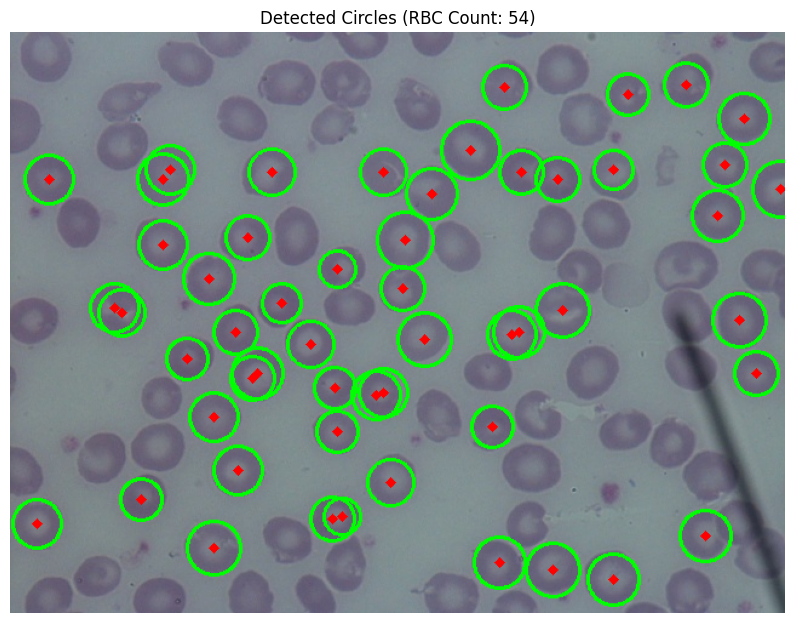

In [ ]:
# Đường dẫn ảnh (dùng đường dẫn tuyệt đối hoặc tương đối chính xác)
image_path = 'D:/AI - ML - DL/Pytorch - Deep Learning/deep_learning_problems/Object Detection Problems/Hough_Transform_Algo/images/image1.jpg'

# Kiểm tra tệp có tồn tại không
if not os.path.exists(image_path):
    print(f"Lỗi: Tệp không tồn tại tại đường dẫn: {image_path}")
else:
    # Đọc ảnh
    image = cv2.imread(image_path)
    
    # Kiểm tra xem ảnh có được đọc không
    if image is None:
        print(f"Lỗi: Không thể đọc tệp ảnh từ đường dẫn: {image_path}")
    else:
        # Chuyển sang thang độ xám
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Làm mờ để giảm nhiễu
        blurred = cv2.GaussianBlur(gray, (9, 9), 2)

        # Phát hiện hình tròn bằng Hough Transform
        circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=5,
                                   param1=50, param2=30, minRadius=10, maxRadius=65)

        # Đếm và vẽ vòng tròn
        if circles is not None:
            circles = np.uint16(np.around(circles))
            rbc_count = circles.shape[1]  # Số lượng hồng cầu
            print(f"Số lượng hồng cầu phát hiện: {rbc_count}")
            
            for i in circles[0, :]:
                # Vẽ vòng tròn bên ngoài
                cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Vẽ tâm vòng tròn
                cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)
        else:
            rbc_count = 0
            print("Không phát hiện được hồng cầu nào.")

        # Hiển thị kết quả
        plt.figure(figsize=(10, 10))  # Kích thước lớn hơn để xem chi tiết
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Detected Circles (RBC Count: {rbc_count})')
        plt.axis('off')
        plt.show()